# Índice

1. [Exploración inicial y preparación de los datos](#1.-Exploración-inicial-y-preparación-de-los-datos)
2. [Análisis univariante](#)
3. [Análisis multivariante](#)


## 1. Exploración inicial y preparación de los datos

In [451]:
#Importamos las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import visualizacion_analisis as viz

In [452]:
#Creamos los DataFrames
df_energia = pd.read_csv("./data/energy_dataset.csv")
df_meteo = pd.read_csv("./data/weather_features.csv")

Comenzamos viendo el DataFrame de la generación de energía en España

In [453]:
df_energia.head(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [454]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

Convertimos el tipo de la columna "time" al formato adecuado y lo usamos como índice del DataFrame

In [455]:
df_energia["time"] = pd.to_datetime(df_energia["time"], utc=True)
df_energia.set_index("time",inplace=True)

df_energia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped s

Para el propósito del presente EDA no necesitaremos ciertas columnas, por lo que eliminamos del DataFrame:
1. La columna "generation hydro pumped storage aggregated", ya que solo contiene nulos
2. Las columnas de previsiones "forecast solar day ahead", "forecast wind offshore eday ahead", "forecast wind onshore day ahead", "total load forecast" y "price day ahead"
3. La columna "total load actual"

In [456]:
columnas_eliminar_energia = ["generation hydro pumped storage aggregated","forecast solar day ahead","forecast wind offshore eday ahead","forecast wind onshore day ahead","total load forecast", "price day ahead", "total load actual"]
df_energia.drop(columns=columnas_eliminar_energia,inplace=True)
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped s

Evaluamos el porcentaje de valores nulos en cada columna para decidir cómo tratarlos

In [457]:
columna_maximo = ""
porcentaje_maximo = 0

for columna in df_energia.columns:
    porcentaje_nulos = (df_energia[columna].isna().sum()/len(df_energia))*100
    print(f"el porcentaje de nulos de la columna {columna} es: {porcentaje_nulos.round(2)}%")
    if porcentaje_nulos > porcentaje_maximo:
        columna_maximo = columna
        porcentaje_maximo = porcentaje_nulos

if columna_maximo !="":
    print(f"\nEl máximo porcentaje de nulos se da en la columna '{columna_maximo}' y es un {porcentaje_maximo.round(2)}%")
else:
    print("Ninguna columna tiene valores nulos")
    

el porcentaje de nulos de la columna generation biomass es: 0.05%
el porcentaje de nulos de la columna generation fossil brown coal/lignite es: 0.05%
el porcentaje de nulos de la columna generation fossil coal-derived gas es: 0.05%
el porcentaje de nulos de la columna generation fossil gas es: 0.05%
el porcentaje de nulos de la columna generation fossil hard coal es: 0.05%
el porcentaje de nulos de la columna generation fossil oil es: 0.05%
el porcentaje de nulos de la columna generation fossil oil shale es: 0.05%
el porcentaje de nulos de la columna generation fossil peat es: 0.05%
el porcentaje de nulos de la columna generation geothermal es: 0.05%
el porcentaje de nulos de la columna generation hydro pumped storage consumption es: 0.05%
el porcentaje de nulos de la columna generation hydro run-of-river and poundage es: 0.05%
el porcentaje de nulos de la columna generation hydro water reservoir es: 0.05%
el porcentaje de nulos de la columna generation marine es: 0.05%
el porcentaje d

Para la columna con mayor porcentaje de nulos, éstos sólo suponen un 0,1% . A la luz de este resultado, podemos eliminar del DataFrame cualquier fila que contenga algún nulo sin provocar un sesgo importante

In [458]:
df_energia.dropna(how="any",inplace=True)
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35040 non-null  float64
 1   generation fossil brown coal/lignite         35040 non-null  float64
 2   generation fossil coal-derived gas           35040 non-null  float64
 3   generation fossil gas                        35040 non-null  float64
 4   generation fossil hard coal                  35040 non-null  float64
 5   generation fossil oil                        35040 non-null  float64
 6   generation fossil oil shale                  35040 non-null  float64
 7   generation fossil peat                       35040 non-null  float64
 8   generation geothermal                        35040 non-null  float64
 9   generation hydro pumped s

Categorizamos la energía generada en cuatro grandes tipos:
* Energía fósil
* Energía renovable
* Energía nuclear
* Otro tipo de energía

Creamos cuatro nuevas columnas con la suma de la energía generada por tipos

In [459]:
df_energia["energia_fosil_generada"] = df_energia["generation fossil brown coal/lignite"] + df_energia["generation fossil coal-derived gas"] \
                                    + df_energia["generation fossil gas"] + df_energia["generation fossil hard coal"] + df_energia["generation fossil oil"] \
                                    + df_energia["generation fossil oil shale"] + df_energia["generation fossil peat"]
                                    
df_energia["energia_renovable_generada"] = df_energia["generation biomass"] + df_energia["generation geothermal"] + df_energia["generation hydro pumped storage consumption"] \
                                        + df_energia["generation hydro run-of-river and poundage"] + df_energia["generation hydro water reservoir"] \
                                        + df_energia["generation marine"] + df_energia["generation other renewable"] + df_energia["generation solar"] \
                                        + df_energia["generation waste"] + df_energia["generation wind offshore"] + df_energia["generation wind onshore"]
                                        
df_energia["energia_nuclear_generada"] = df_energia["generation nuclear"]

df_energia["energia_otros_generada"] = df_energia["generation other"]

Sobre una copia del DataFrame, eliminamos las columnas originales tras la agrupación

In [460]:
df_energia_agrupado = df_energia.copy()

columnas_eliminar = ["generation fossil brown coal/lignite","generation fossil coal-derived gas","generation fossil gas","generation fossil hard coal","generation fossil oil",\
                    "generation fossil oil shale","generation fossil peat","generation biomass","generation geothermal","generation hydro pumped storage consumption",\
                    "generation hydro run-of-river and poundage","generation hydro water reservoir","generation marine","generation other renewable","generation solar",\
                    "generation waste","generation wind offshore","generation wind onshore","generation nuclear","generation other"]

df_energia_agrupado.drop(columns=columnas_eliminar,inplace=True)

Renombramos el resto de columnas y el índice con su nombre en español

In [461]:
df_energia_agrupado.rename(columns={"price actual":"precio_energia"}, inplace=True)
df_energia_agrupado.rename_axis('fecha_hora_UTC',inplace=True)
df_energia_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   precio_energia              35040 non-null  float64
 1   energia_fosil_generada      35040 non-null  float64
 2   energia_renovable_generada  35040 non-null  float64
 3   energia_nuclear_generada    35040 non-null  float64
 4   energia_otros_generada      35040 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


Agrupamos los datos por dias en vez de por horas para tener un DataFrame mas manejable de cara al análisis:
* Para la energía generada sumamos la energía generada cada dia
* Para el precio de la energía calculamos la media del precio cada dia

In [462]:
df_energia_agrupado = df_energia_agrupado.resample('D').agg({'precio_energia': 'mean', 'energia_fosil_generada': 'sum','energia_renovable_generada': 'sum','energia_nuclear_generada': 'sum','energia_otros_generada': 'sum'})
df_energia_agrupado['fecha'] = df_energia_agrupado.index.date
df_energia_agrupado.set_index("fecha",inplace=True)
df_energia_agrupado.index = pd.to_datetime(df_energia_agrupado.index)

In [463]:
df_energia_agrupado.head()

,precio_energia,energia_fosil_generada,energia_renovable_generada,energia_nuclear_generada,energia_otros_generada
fecha,,,,,
2014-12-31,65.410000,10156.0,10956.0,7096.0,43.0
2015-01-01,62.090833,208619.0,245558.0,170338.0,1016.0
2015-01-02,69.443750,120603.0,467291.0,170530.0,1095.0
2015-01-03,65.223333,121381.0,422993.0,170279.0,1876.0
2015-01-04,58.912083,149079.0,391989.0,166957.0,1969.0


In [464]:
df_energia_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2014-12-31 to 2018-12-31
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   precio_energia              1462 non-null   float64
 1   energia_fosil_generada      1462 non-null   float64
 2   energia_renovable_generada  1462 non-null   float64
 3   energia_nuclear_generada    1462 non-null   float64
 4   energia_otros_generada      1462 non-null   float64
dtypes: float64(5)
memory usage: 68.5 KB


In [465]:
df_energia_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2014-12-31 to 2018-12-31
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   precio_energia              1462 non-null   float64
 1   energia_fosil_generada      1462 non-null   float64
 2   energia_renovable_generada  1462 non-null   float64
 3   energia_nuclear_generada    1462 non-null   float64
 4   energia_otros_generada      1462 non-null   float64
dtypes: float64(5)
memory usage: 68.5 KB


Continuamos con el DataFrame asociado de las condiciones climáticas de varias ciudades de España

In [466]:
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

Convertimos el tipo de la columna "dt_iso" al formato adecuado y lo usamos como índice del DataFrame

In [467]:
df_meteo["dt_iso"] = pd.to_datetime(df_meteo["dt_iso"], utc=True)
df_meteo.set_index("dt_iso",inplace=True)

df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178396 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   city_name            178396 non-null  object 
 1   temp                 178396 non-null  float64
 2   temp_min             178396 non-null  float64
 3   temp_max             178396 non-null  float64
 4   pressure             178396 non-null  int64  
 5   humidity             178396 non-null  int64  
 6   wind_speed           178396 non-null  int64  
 7   wind_deg             178396 non-null  int64  
 8   rain_1h              178396 non-null  float64
 9   rain_3h              178396 non-null  float64
 10  snow_3h              178396 non-null  float64
 11  clouds_all           178396 non-null  int64  
 12  weather_id           178396 non-null  int64  
 13  weather_main         178396 non-null  object 
 14  weather_description  1

Al igual que para el DataFrame anterior, hay columnas que no son necesarías para el propósito del EDA y las eliminamos del DataFrame:
1. Las columnas de codificación "weather_id" y "weather_icon"
2. Las columnas de descripción "weather_main" y"weather_description"
3. Las columnas temp_min y temp_max

In [468]:
columnas_eliminar_meteo = ["weather_id","weather_main","weather_description","weather_icon","temp_min","temp_max"]
df_meteo.drop(columns=columnas_eliminar_meteo,inplace=True)
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178396 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city_name   178396 non-null  object 
 1   temp        178396 non-null  float64
 2   pressure    178396 non-null  int64  
 3   humidity    178396 non-null  int64  
 4   wind_speed  178396 non-null  int64  
 5   wind_deg    178396 non-null  int64  
 6   rain_1h     178396 non-null  float64
 7   rain_3h     178396 non-null  float64
 8   snow_3h     178396 non-null  float64
 9   clouds_all  178396 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 15.0+ MB


No hay nulos entre los datos. Continuamos eliminando los caracteres en blanco de la columna "city_name"

In [469]:
df_meteo["city_name"] = df_meteo["city_name"].str.strip()

Renombramos el resto de columnas y el índice con su nombre en español

In [470]:
df_meteo.rename(columns={"dt_iso":"fecha_hora_UTC","city_name":"ciudad","temp":"temperatura","temp_min":"tempratura_min","temp_max":"tempratura_max","pressure":"presion","humidity":"humedad", \
                        "wind_speed":"velocidad_viento","wind_deg":"direccion_grados","rain_1h":"lluvia_1h","rain_3h":"lluvia_3h","snow_3h":"nieve_3h","clouds_all":"cobertura_nubes"}, inplace=True)
df_meteo.rename_axis('fecha_hora_UTC',inplace=True)

df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178396 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ciudad            178396 non-null  object 
 1   temperatura       178396 non-null  float64
 2   presion           178396 non-null  int64  
 3   humedad           178396 non-null  int64  
 4   velocidad_viento  178396 non-null  int64  
 5   direccion_grados  178396 non-null  int64  
 6   lluvia_1h         178396 non-null  float64
 7   lluvia_3h         178396 non-null  float64
 8   nieve_3h          178396 non-null  float64
 9   cobertura_nubes   178396 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 15.0+ MB


Agrupamos los datos por dias en vez de por horas para tener un DataFrame mas manejable de cara al análisis:
* Para la energía generada sumamos la energía generada cada dia
* Para el precio de la energía calculamos la media del precio cada dia

In [471]:
columnas_agrupar = [columna for columna in df_meteo.columns if "ciudad" not in columna]
df_meteo_agrupado = df_meteo.groupby([df_meteo.index.date])[columnas_agrupar].mean()
df_meteo_agrupado.index = pd.to_datetime(df_meteo_agrupado.index)
df_meteo_agrupado.rename_axis("fecha",inplace=True)

In [472]:
df_meteo_agrupado.head()

,temperatura,presion,humedad,velocidad_viento,direccion_grados,lluvia_1h,lluvia_3h,nieve_3h,cobertura_nubes
fecha,,,,,,,,,
2014-12-31,272.491463,1016.400000,82.400000,2.000000,135.200000,0.000,0.0,0.0,0.000000
2015-01-01,277.001207,1022.125000,75.466667,1.933333,184.866667,0.000,0.0,0.0,0.850000
2015-01-02,277.951217,1024.691667,77.891667,1.575000,213.858333,0.000,0.0,0.0,6.291667
2015-01-03,278.829727,1020.375000,78.016667,1.558333,188.366667,0.000,0.0,0.0,1.883333
2015-01-04,279.643354,1016.008333,77.358333,1.250000,158.775000,0.045,0.0,0.0,11.608333


In [473]:
df_meteo_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2014-12-31 to 2018-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperatura       1462 non-null   float64
 1   presion           1462 non-null   float64
 2   humedad           1462 non-null   float64
 3   velocidad_viento  1462 non-null   float64
 4   direccion_grados  1462 non-null   float64
 5   lluvia_1h         1462 non-null   float64
 6   lluvia_3h         1462 non-null   float64
 7   nieve_3h          1462 non-null   float64
 8   cobertura_nubes   1462 non-null   float64
dtypes: float64(9)
memory usage: 114.2 KB


Clasificamos de la dirección del viento en una nueva columna del DataFrame

In [474]:
#Definimos la funcion que hace la clasificacion
def clasificador_direccion(grados):
    if grados > 337.5:
        return "N"
    if grados > 292.5:
        return "NO"
    if grados > 247.5:
       return "O"
    if grados > 202.5:
        return "SO"
    if grados > 157.5:
        return "S"
    if grados>122.5:
        return "SE"
    if grados>67.5:
        return "E"
    if grados>22.5:
        return "NE"
    else:
        return "N"
    
df_meteo_agrupado["direccion_viento"] = df_meteo_agrupado["direccion_grados"].apply(clasificador_direccion)

In [475]:
df_meteo_agrupado.head()

,temperatura,presion,humedad,velocidad_viento,direccion_grados,lluvia_1h,lluvia_3h,nieve_3h,cobertura_nubes,direccion_viento
fecha,,,,,,,,,,
2014-12-31,272.491463,1016.400000,82.400000,2.000000,135.200000,0.000,0.0,0.0,0.000000,SE
2015-01-01,277.001207,1022.125000,75.466667,1.933333,184.866667,0.000,0.0,0.0,0.850000,S
2015-01-02,277.951217,1024.691667,77.891667,1.575000,213.858333,0.000,0.0,0.0,6.291667,SO
2015-01-03,278.829727,1020.375000,78.016667,1.558333,188.366667,0.000,0.0,0.0,1.883333,S
2015-01-04,279.643354,1016.008333,77.358333,1.250000,158.775000,0.045,0.0,0.0,11.608333,S


In [476]:
df_meteo_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2014-12-31 to 2018-12-31
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperatura       1462 non-null   float64
 1   presion           1462 non-null   float64
 2   humedad           1462 non-null   float64
 3   velocidad_viento  1462 non-null   float64
 4   direccion_grados  1462 non-null   float64
 5   lluvia_1h         1462 non-null   float64
 6   lluvia_3h         1462 non-null   float64
 7   nieve_3h          1462 non-null   float64
 8   cobertura_nubes   1462 non-null   float64
 9   direccion_viento  1462 non-null   object 
dtypes: float64(9), object(1)
memory usage: 125.6+ KB


## 2. Análisis univariante

Comenzamos el análisis para el DataFrame de energía generada realizando la clasificación de las variables

In [477]:
df_energia_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2014-12-31 to 2018-12-31
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   precio_energia              1462 non-null   float64
 1   energia_fosil_generada      1462 non-null   float64
 2   energia_renovable_generada  1462 non-null   float64
 3   energia_nuclear_generada    1462 non-null   float64
 4   energia_otros_generada      1462 non-null   float64
dtypes: float64(5)
memory usage: 68.5 KB


|Columna/Variable           | Descripción                             |Tipo de variable  |Importancia inicial  | Notas                                                                                               |
|---------------------------|-----------------------------------------|------------------|---------------------|-----------------------------------------------------------------------------------------------------|
|precio_energia             | Precio de la energía en EUR/hora        | Numérica continua| 1                   | Permitirá un análisis sobre el precio de la energía en función del método de generación  |
|energia_fosil_generada     | Energía fósil generada en MW            | Numérica continua| 0                   | Permitirá ver la evolución de la energía fósil generada y su relación con el resto                                             |
|energia_renovable_generada | Energía renovable generada en MW        | Numérica continua| 0                   | Permitirá ver la evolución de la energía renovable generada y su relación con el resto                                        |
|energia_nuclear_generada   | Energía nuclear generada en MW          | Numérica continua| 0                   | Permitirá ver la evolución de la energía nuclear generada y su relación con el resto                                          |
|energia_otros_generada     | Energía generada por otros medios en MW | Numérica continua| 0                   | Permitirá ver la evolución de la energía generada por otros medios y su relación con el resto                                 |

In [478]:
#Obtenemos la principales medidas de tendencia central
df_energia_agrupado_analisis = df_energia_agrupado.describe().T.drop(columns=["count"]).round(1)

#Incluimos el coeficiente de variacion
df_energia_agrupado_analisis["coeficiente_variacion"] = 0.0
for variable in df_energia_agrupado_analisis.index:
    cv = round((df_energia_agrupado_analisis.loc[variable, "mean"]/df_energia_agrupado_analisis.loc[variable, "std"])*100,1)
    df_energia_agrupado_analisis.loc[variable, "coeficiente_variacion"] = cv
    
df_energia_agrupado_analisis

,mean,std,min,25%,50%,75%,max,coeficiente_variacion
precio_energia,57.9,12.1,14.5,50.8,58.6,66.5,99.0,478.5
energia_fosil_generada,254650.9,86012.8,10156.0,182683.5,258934.0,316320.0,540219.0,296.1
energia_renovable_generada,280155.6,87632.4,10956.0,214887.5,260803.0,331699.0,573413.0,319.7
energia_nuclear_generada,150129.9,20038.1,7096.0,137454.8,157616.0,167808.5,170701.0,749.2
energia_otros_generada,1443.5,470.3,43.0,1280.0,1382.0,1913.0,2300.0,306.9


(5, 2)


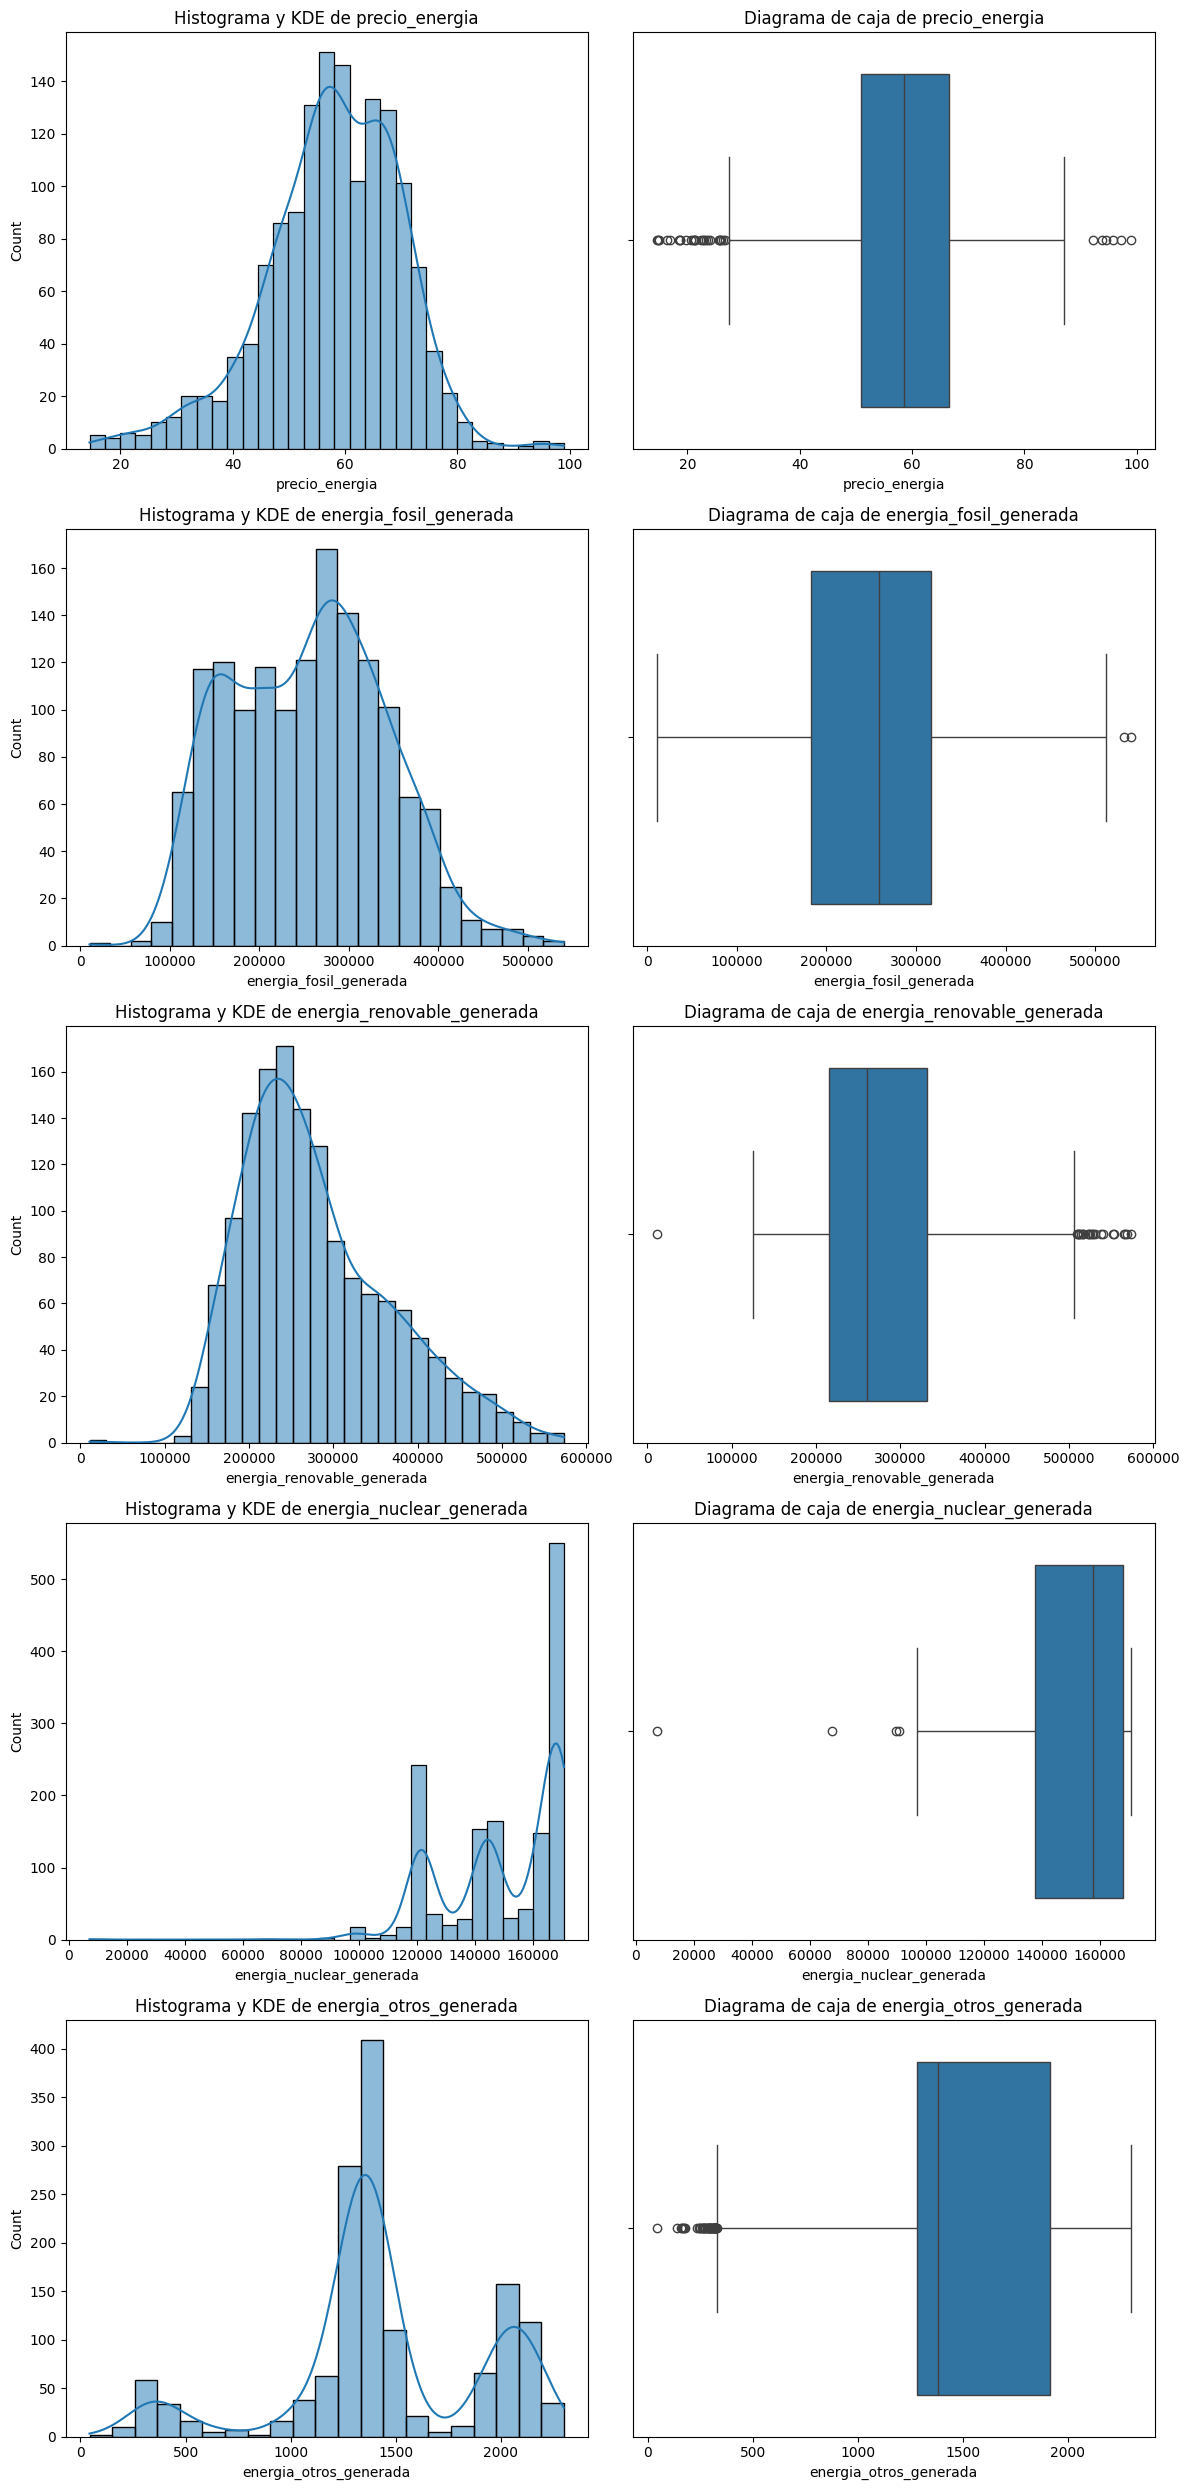

In [479]:
#Visualizamos los histogramas, KDE y diagramas de cajas
viz.multiples_combinados(df_energia_agrupado,df_energia_agrupado.columns.values)

Comentarios por variable:
1. precio_energia: distribución con cierta simetría y agrupación, aunque dispersa. Muchos *outliers* por debajo del *minimum* y por encima del *maximum* que invitan a analizar la relación del precio con el tipo de generación
2. energia_fosil_generada: distribución con cierta simetría, aunque dispersa. Muchos *outliers* por encima del *maximum* que invitan a relacionarlo con otros tipos de generación 
3. energia_renovable_generada: distribución con cierta simetría, aunque dispersa. Muchos *outliers* por encima del *maximum* que invitan a relacionarlo con otros tipos de generación 
4. energia_nuclear_generada: distribución con rangos muy definidos y dispersa. Muchos *outliers* por debajo del *minimum* que invitan a relacionarlo con otros tipos de generación
5. energia_otros_generada: distribución con rangos muy definidos y dispersa. Muchos *outliers* por debajo del *minimum* que invitan a relacionarlo con otros tipos de generación 

## 3. Análisis multivariante

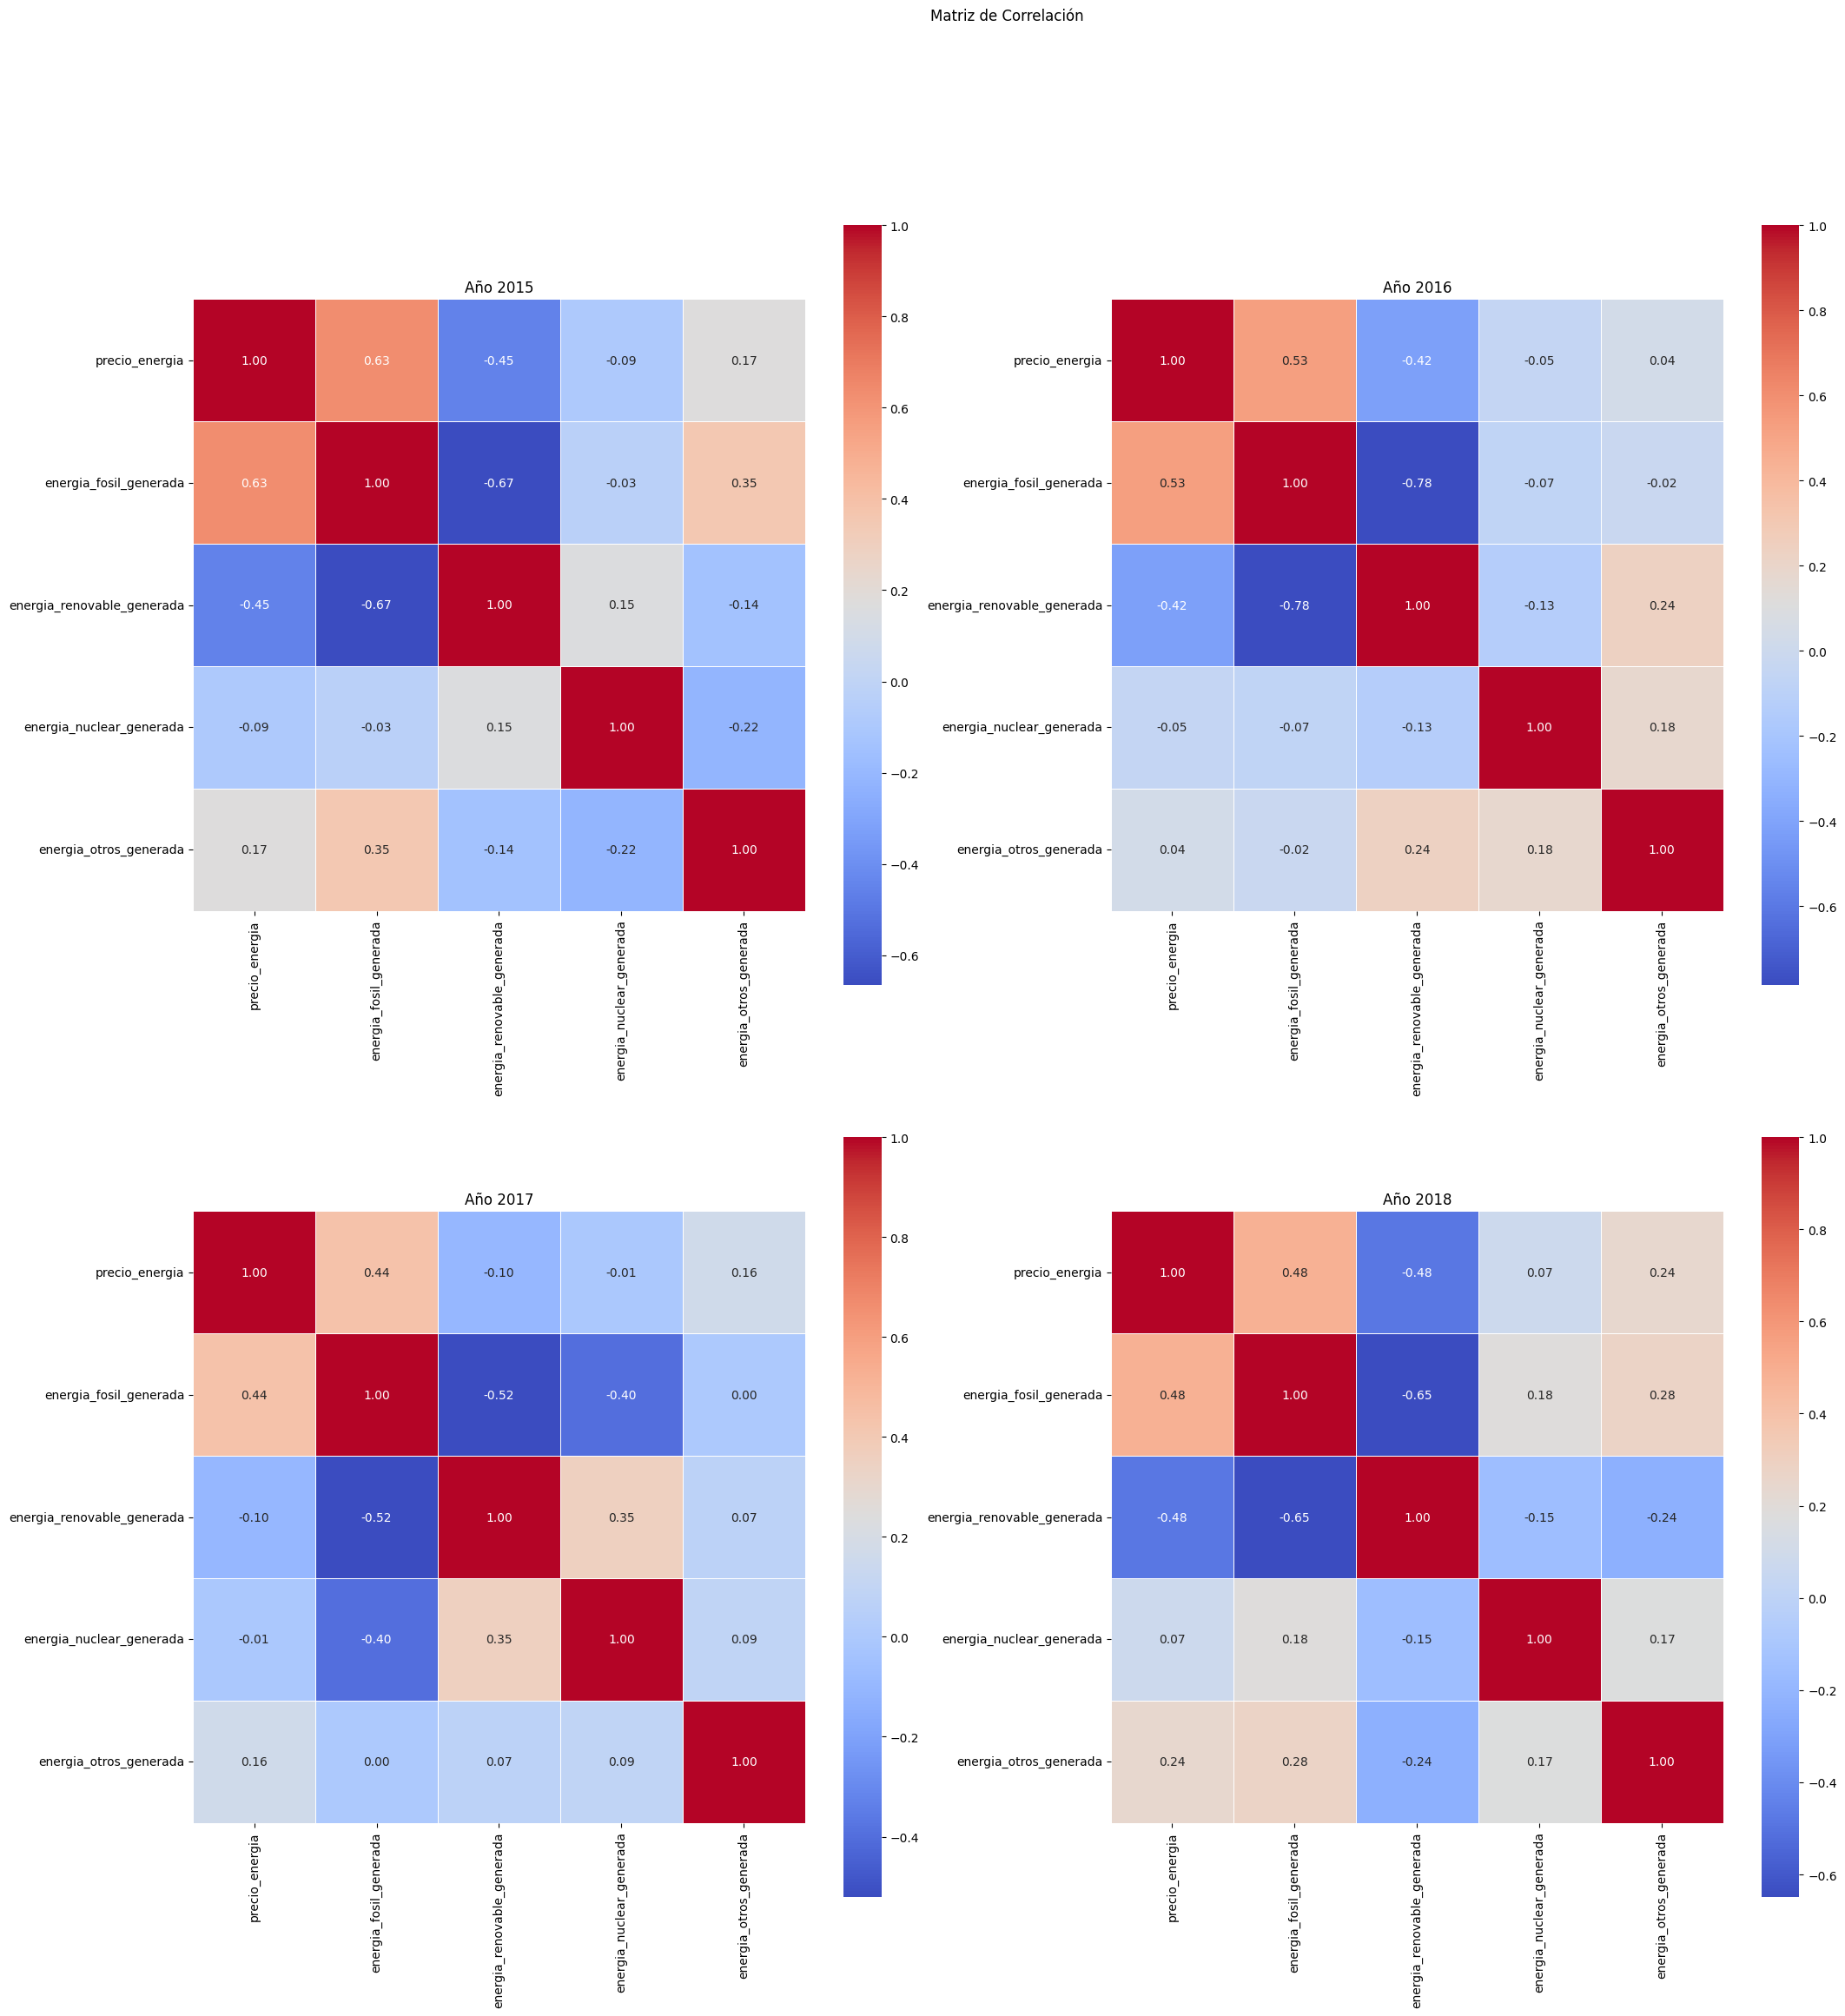

In [480]:
#Muestro el Heatmap por años
fig, axs = plt.subplots(2,2, figsize=(25, 25))  #1 fila y 2 columnas

axs = axs.flatten() #Se convierte cualquier array en un array unidimensional

for indice,anyo in enumerate([2015,2016,2017,2018]):
    
    #Calculo la matriz de correlacion
    corr_matrix = df_energia_agrupado.loc[df_energia_agrupado.index.year==anyo].corr(numeric_only=True)
    corr_matrix
    
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=axs[indice], cbar=True, square=True, linewidths=.5)
    axs[indice].set_title(f"Año {anyo}")


plt.suptitle('Matriz de Correlación')
plt.show()

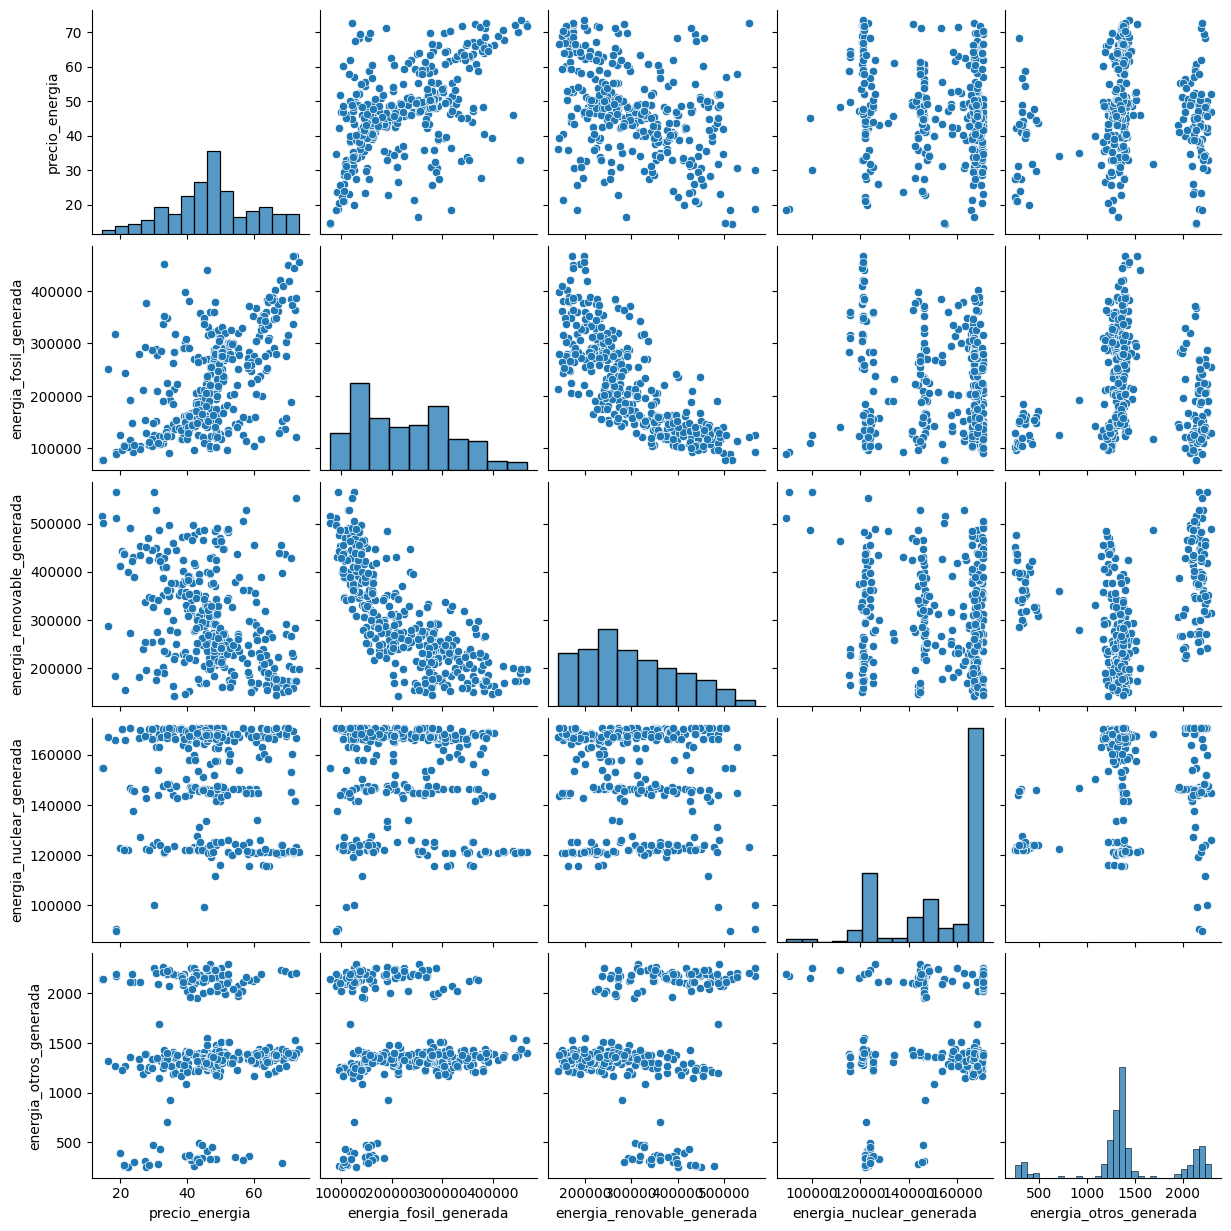

In [481]:
#Muestro el Pairplot
sns.pairplot(df_energia_agrupado.loc[df_energia_agrupado.index.year==2016])
plt.show()

## 3. Análisis univariante de las condiciones climáticas en España


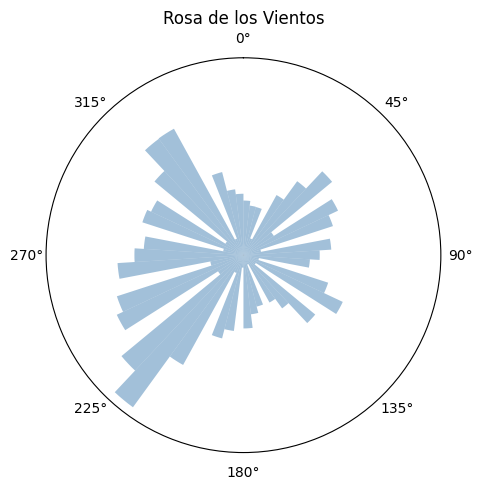

In [ ]:
#Dibujamos la rosa de los vientos
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(5,5))
    
#Convertir grados a radianes
direcciones_rad = np.radians(df_meteo.loc[df_meteo["velocidad_viento"]>1, "direccion_grados"])
    
#Histograma polar
ax.hist(direcciones_rad, bins=50, color="steelblue", alpha=0.5)
    
#Ponemos el cero apuntando al Norte
ax.set_theta_zero_location('N')

#Los grados avanzan en el grafico en sentido horario
ax.set_theta_direction(-1)

#Quitamos la rejilla y los valores
ax.set_yticklabels([])
ax.set_yticks([])

#Quitamos la rejilla de los grados
ax.grid(False)

#Definimos el titulo
plt.title("Rosa de los Vientos")
    
plt.tight_layout() #para que se muestre limpio
plt.show()